In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/forwards/ArielInstrumentTier2"
subfolders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

print(subfolders)

len(subfolders)


['HD63433bFiduR', 'GJ3090bFiduR', 'K2-26bFidu', 'HD191939bFiduR', 'HD86226cFidu', 'TOI-270cFiduR', 'TOI-2015bFidu', 'TOI-421bFiduR', 'TOI-776cMigR', 'TOI-269bFiduR', 'HD63433cMigR', 'LP791-18cFidu', 'TOI-1468cMigR', 'TOI-1136eFidu', 'HIP94235bMig', 'piMencMigR', 'TOI-2120bMig', 'HD28109dMig', 'LTT3780cMig', 'TOI-2136bMig', 'TOI-122bFidu', 'TOI-776bFiduR', 'K2-25bFidu', 'HD93963AcFiduR', 'TOI-700cFiduR', 'TOI-1136bFidu', 'HD191939cFiduR', 'HD110113bMigR', 'TOI-251bFiduR', 'TOI-1136cMigR', 'TOI-1266bFiduR', 'TOI-782bMigR', 'TOI-1136gFidu', 'TOI-2136bMigR', 'TOI-270dFidu', 'G9-40bMig', 'Kepler-109cMig', 'TOI-904bMig', 'HD109833bMig', 'TOI-4479bMig', 'K2-417bFiduR', 'K2-3bFidu', 'TOI-1801bMigR', 'HD191939bFidu', 'HD86226cMigR', 'TOI-4438bFiduR', 'HD191939dFiduR', 'TOI-451cFiduR', 'HD63433bFidu', 'TOI-1136eMigR', 'TOI-421bFidu', 'TOI-4336AbMig', 'GJ1214bFidu', 'piMencMig', 'TOI-1266cFiduR', 'HD63433cMig', 'TOI-1470cMig', 'TOI-2120bMigR', 'TOI-4479bMigR', 'TOI-1201bMig', 'TOI-2015bFiduR', 'T

100

In [2]:
# check failed
from astropy.io import ascii


targetlist = ascii.read("/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/20250520_ArielTargetSimul_Metadata.csv")

directory_t3 = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/20250520/forwards/ArielInstrumentTier3"
subfolders_check = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name)) 
                    and os.path.exists(os.path.join(os.path.join(directory, name), name+".txt"))]


idx = [i for i, name in enumerate(targetlist["Planet Name"]) if name not in subfolders_check]
missing_planets = targetlist[idx]

print(missing_planets["Planet Name"])
print(len(missing_planets))
# ascii.write(missing_planets, "missing_planets.csv", format='csv', overwrite=True)

  Planet Name   
----------------
   HD63935bFiduR
   HD28109dFiduR
  HD109833bFiduR
   HD63433cFiduR
  TOI-1136cFiduR
  TOI-1136eFiduR
  TOI-1136gFiduR
    K2-138fFiduR
  HIP94235bFiduR
Kepler-109cFiduR
             ...
    TOI-1266cMig
       K2-26bMig
     TOI-122bMig
        K2-3bMig
    TOI-1468cMig
    TOI-1470bMig
      GJ3090bMig
     TOI-776bMig
      K2-417bMig
    TOI-2015bMig
       K2-25bMig
Length = 143 rows
143


FileNotFoundError: forwards/ArielInstrumentTier2/TOI-782bFidu/TOI-782bFidu.txt not found.

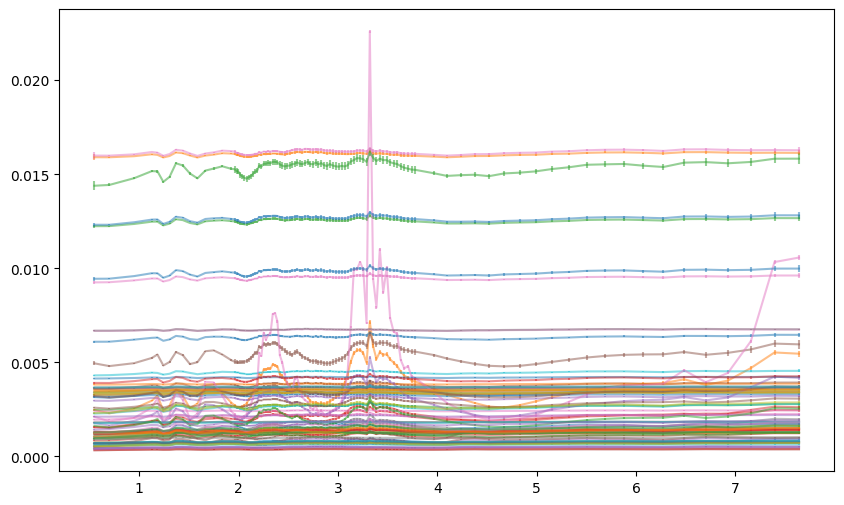

In [3]:
fig = plt.figure(figsize=(10, 6))
for file_ in subfolders:
    data = np.loadtxt('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.txt').T
    plt.errorbar(data[0], data[1], yerr=data[2], alpha=0.5, label=file_)

# plt.legend()
plt.xlim(1.2, 4)

In [4]:
import h5py

nobs = []
for file_ in subfolders:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        # print(f["ModelParameters/Chemistry"].keys())
        nobs.append(f["Output/Spectra/instrument_nobs"][()])

print(nobs)

BlockingIOError: [Errno 11] Unable to synchronously open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

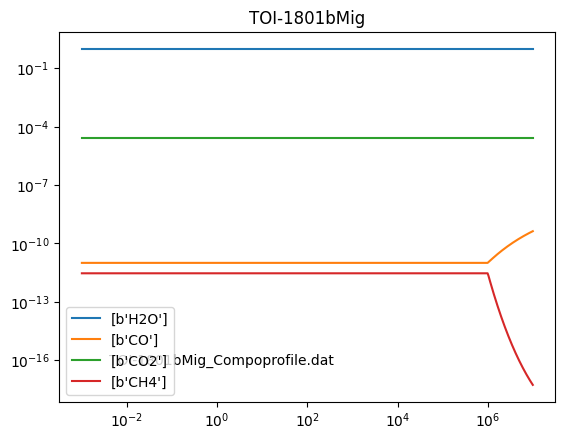

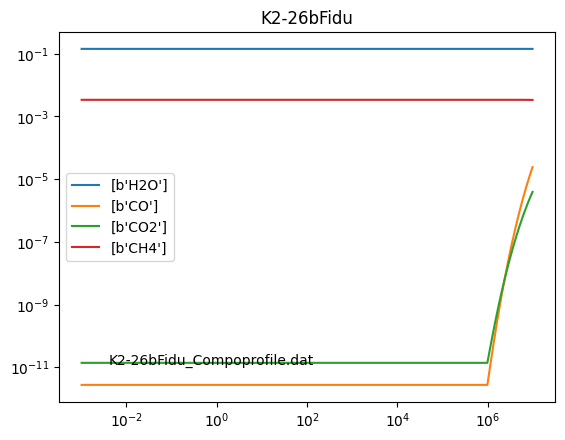

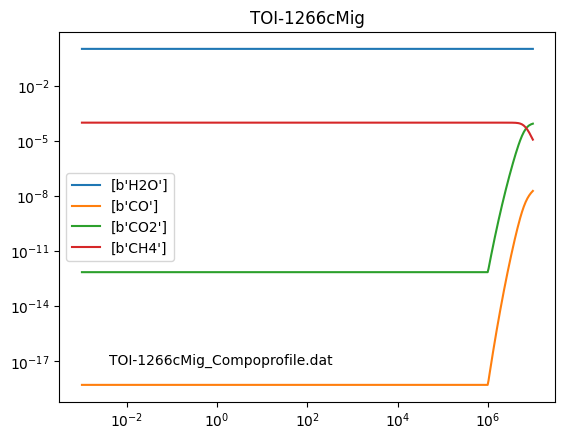

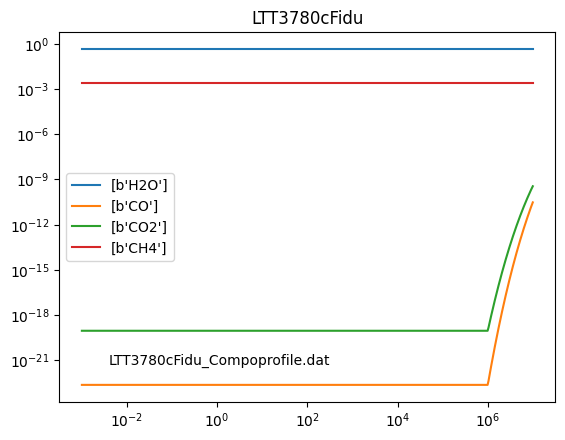

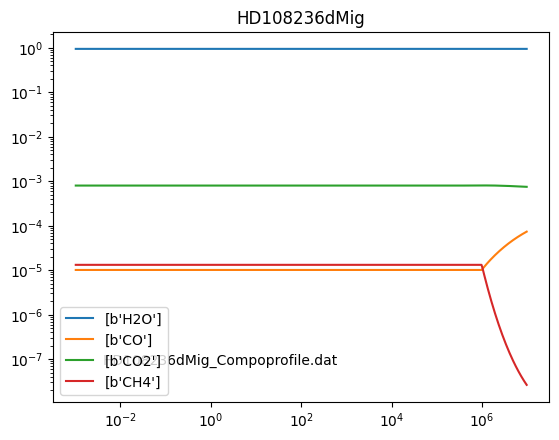

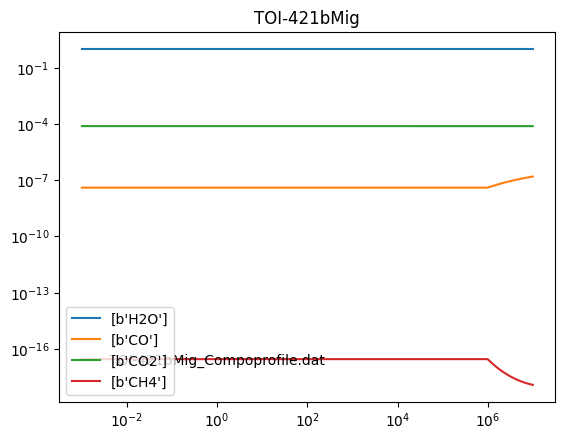

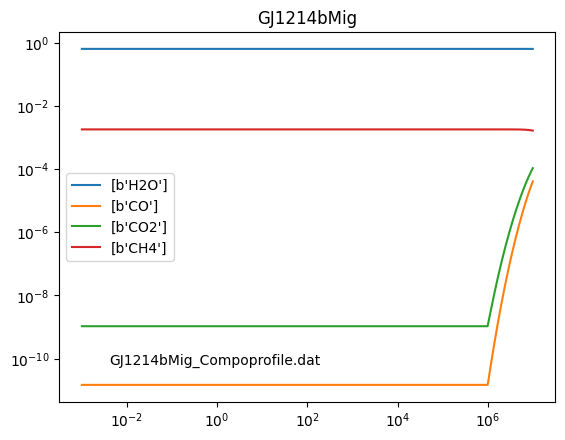

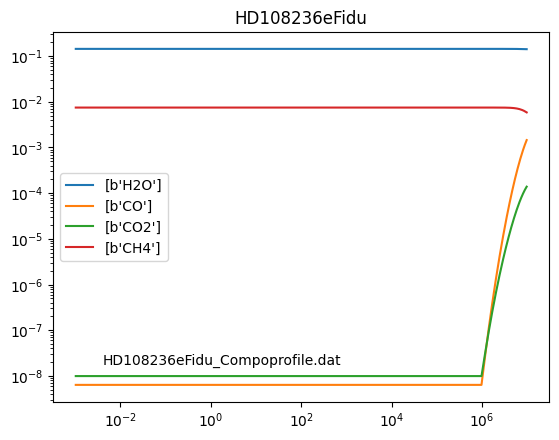

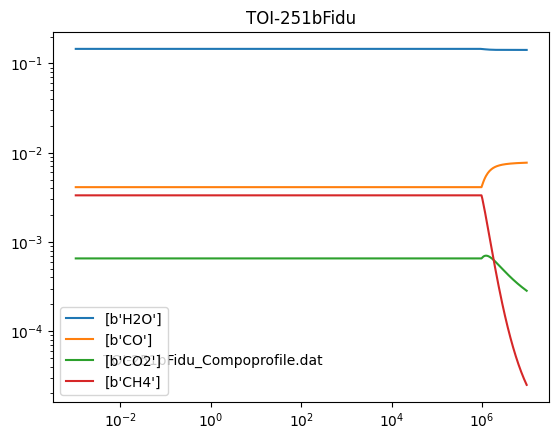

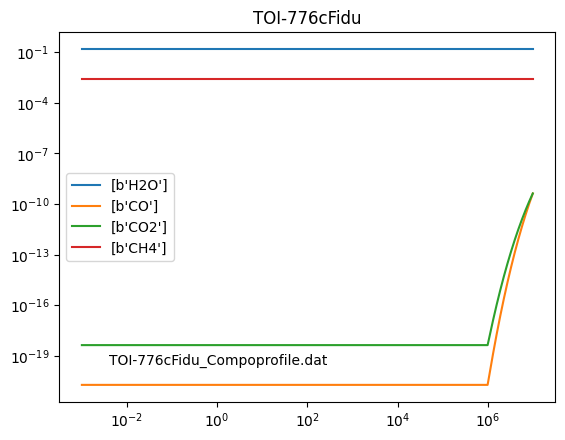

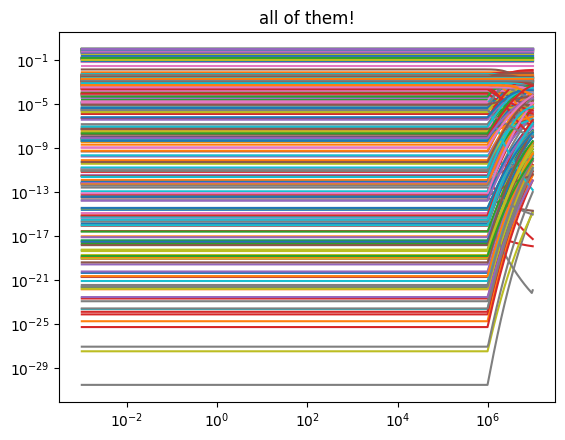

In [ ]:
# files = ["Planet99542_Reduced"]
files = subfolders

for file_ in files[:10]:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        fname = (f["ModelParameters/Chemistry/filename"][()])
        mols = f["ModelParameters/Chemistry/active_gases"][()]
        profile = f["Output/Profiles/active_mix_profile"][()] 
        
        fname = fname.decode("utf-8").split("/")[-1]
        plt.title(file_)
        for m,p in zip(mols, profile):
            plt.plot(f["Output/Profiles/pressure_profile"][()], p, label=m)
        plt.annotate(fname, (0.1, 0.1), xycoords="axes fraction")
        plt.xscale("log")
        plt.yscale("log")
        plt.legend()
        plt.show()
    # nobs.append(f["Output/Spectra/instrument_nobs"][()])
    
    
for file_ in files:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        fname = (f["ModelParameters/Chemistry/filename"][()])
        mols = f["ModelParameters/Chemistry/active_gases"][()]
        profile = f["Output/Profiles/active_mix_profile"][()] 
        
        fname = fname.decode("utf-8").split("/")[-1]
        for m,p in zip(mols, profile):
            plt.plot(f["Output/Profiles/pressure_profile"][()], p, label=m)
        # plt.annotate(fname, (0.1, 0.1), xycoords="axes fraction")

    plt.title("all of them!")

    plt.xscale("log")
    plt.yscale("log")
        # plt.legend()
        # plt.show()